In [1]:
from methods.helper import *
from scipy.stats import chi2_contingency
# Suppress warnings
import warnings
from sklearn.linear_model import LogisticRegression
from scipy.stats import ks_2samp
warnings.filterwarnings('ignore')

C:\Users\mjgoj\miniconda3\Lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [2]:
# Load data
lipidomics, metabolomics, proteomics = load_data()

proteomics_test, proteomics_train = get_train_test_split_dataset(proteomics)
print(proteomics_test.shape, proteomics_train.shape)

(58, 323) (38, 323)


**Chi-squared test** for determining whether the distribution of **APOE** sequences is different between the two groups.

Hovewer, Chi-squared test is not suitable for continuous data. Therefore, I will use the **Kolmogorov-Smirnov test** to determine whether the distribution of the APOE sequences is different between the two groups.

In [3]:
def plot_distribution(train_data, test_data, title):
    """
    Plot the distribution of the given data.
    :param train_data: Data in the training dataset
    :param test_data: Data in the test dataset
    :param title: Title of the plot
    """
    
    # Combine the dataframes together
    plotting_df = pd.DataFrame({'train': train_data, 'test': test_data})
    # Plot the distribution
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    sns.violinplot(
        plotting_df, scale='width', palette=["deepskyblue", "tomato"], 
        ax=ax[0], label=['train', 'test'])
    # Do not show the x ticks
    ax[0].set_xticks([])
    # Plot the distribution
    sns.histplot(test_data, color='tomato', ax=ax[1], label='test')
    sns.histplot(train_data, color='deepskyblue', ax=ax[1], label='train')
    # Set the x label
    ax[1].set_xlabel('')
    # Set the title
    plt.suptitle(title)
    # Add the legend
    plt.legend()
    plt.show()
    

In [4]:
def KS_test(train_data, test_data):
    """
    Perform Chi-squared test to determine whether the distribution of APOE sequences is different between the two groups.
    :param train_data: APOE sequences in the training dataset
    :param test_data: APOE sequences in the test dataset
    """
    
    ks_statistic, p_value = ks_2samp(train_data, test_data)
    if p_value < 0.05:
        decision = "The distributions are significantly different"
    else:
        decision = "The distributions are not significantly different"
    print(decision, "(p-value: {:.4f})".format(p_value))

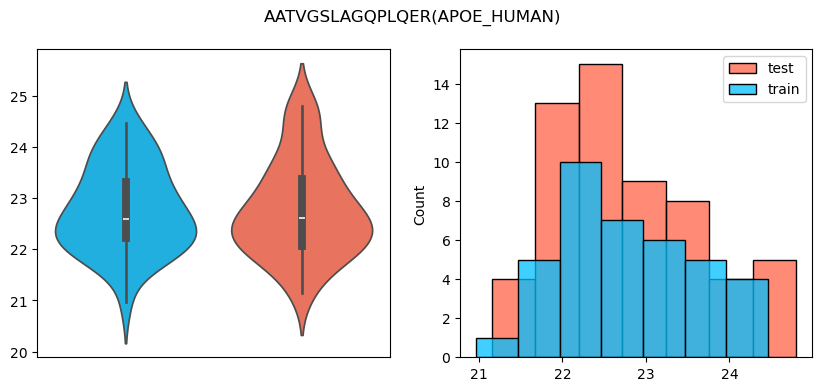

The distributions are not significantly different (p-value: 0.9869)


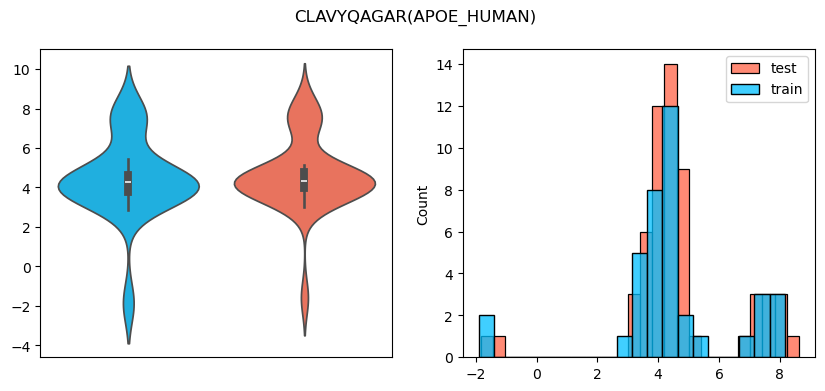

The distributions are not significantly different (p-value: 0.3900)


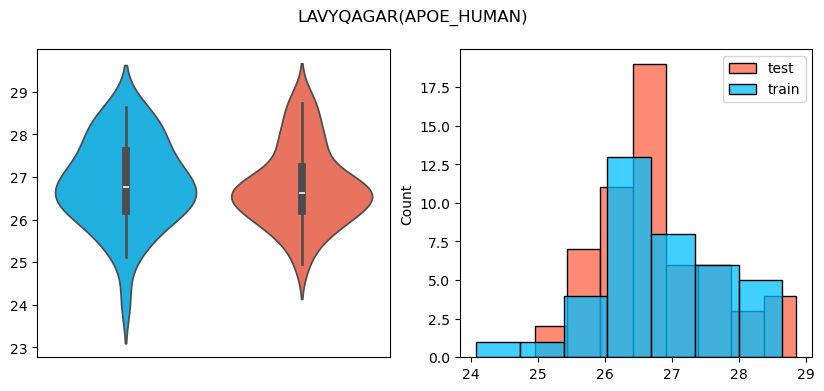

The distributions are not significantly different (p-value: 0.5766)


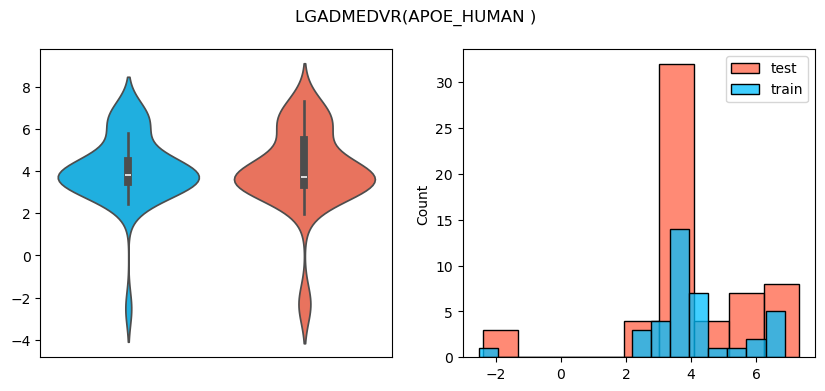

The distributions are not significantly different (p-value: 0.9307)


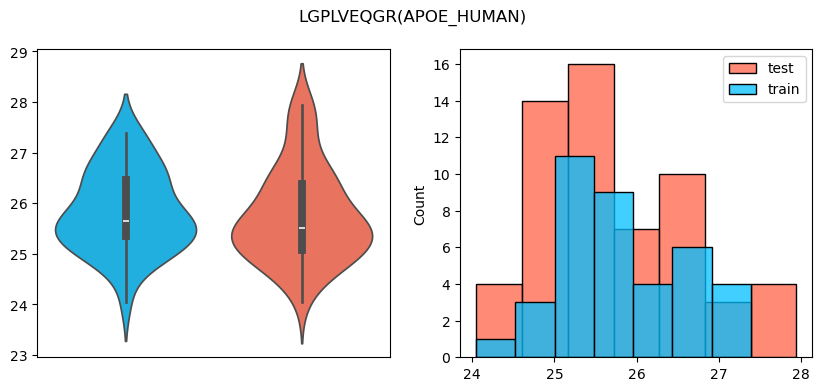

The distributions are not significantly different (p-value: 0.6039)


In [5]:
peptide_sequences = proteomics_test.columns[3:]

for sequence in peptide_sequences:
    protein = get_protein_name(sequence)
    if protein.startswith('APOE'):
        plot_distribution(
            proteomics_train[sequence], proteomics_test[sequence], 
            sequence + '(' + protein + ')')
        KS_test(proteomics_train[sequence], proteomics_test[sequence])
        